In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
tips = pd.read_csv("tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips.shape

(244, 7)

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<h4> * HOW MANY WEEKDAYS ARE PRESENT IN THE DATA SET?

In [6]:
# The function .unique() is used to determine the dinstinct values under each column
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

<h4> * HOW MANY DINNERS AND LUNCHES DATA ARE PRESENT IN THE DATA SET?

In [7]:
tips.time.unique()


array(['Dinner', 'Lunch'], dtype=object)

In [8]:
#value_counts function is used to determine the sum of each of the distinct values
tips.day.value_counts(ascending=True)

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64

<AxesSubplot:>

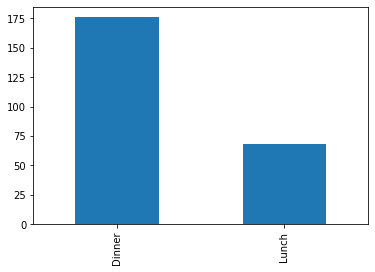

In [9]:
tips.time.value_counts().plot(kind='bar') 

<h4> *WHAT IS THE PROPORTION OF THE DINNER AND LUNCH IN %?

In [10]:
#The "normalize=True" attribute in the function helps determine the percentage ratio.
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

<h4> * WHAT IS THE PERCENTAGE RATIO OF MEN TO WOMEN THAT TIPPED? 

In [11]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [12]:
tips.sex.value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

<h4> * WHEN DOES PEOPLE PAY MORE TIPS (E.G DINNER OR LUNCH)?

In [13]:
tips_group = pd.DataFrame(tips.groupby(["time"]).mean()["tip"])
tips_group

,tip
time,
Dinner,3.102670
Lunch,2.728088


<AxesSubplot:xlabel='time'>

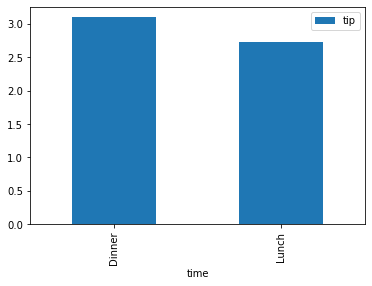

In [14]:
tips_group.plot.bar()

In [15]:
tip_smoker = pd.DataFrame(tips.groupby(['sex','smoker'])['tip'].mean())
tip_smoker

tip
sex    smoker          
Female No      2.773519
       Yes     2.931515
Male   No      3.113402
       Yes     3.051167

In [16]:
tip_smoker = pd.DataFrame(tips.groupby(['smoker','sex'])['tip'].mean()).unstack()
tip_smoker

tip          
sex       Female      Male
smoker                    
No      2.773519  3.113402
Yes     2.931515  3.051167

<AxesSubplot:xlabel='smoker'>

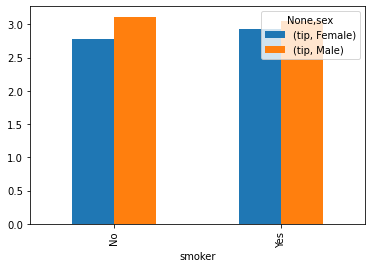

In [17]:
tip_smoker.plot(kind="bar")

In [18]:
tip_sex = pd.DataFrame(tips.groupby("sex").sum()["tip"])
tip_sex

,tip
sex,
Female,246.51
Male,485.07


<AxesSubplot:xlabel='sex'>

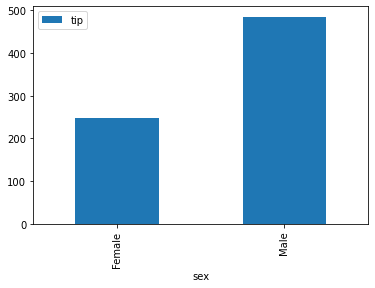

In [19]:
tip_sex.plot(kind="bar")

In [20]:
tip_day = pd.DataFrame(tips.groupby("day").sum()["tip"])
tip_day

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


<AxesSubplot:xlabel='day'>

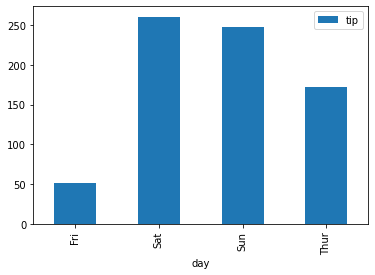

In [21]:
tip_day.plot.bar()

In [22]:
tips_size = pd.DataFrame(tips.groupby("size").sum()["tip"])
tips_size

,tip
size,
1,5.75
2,402.84
3,128.94
4,153.01
5,20.14
6,20.90


<AxesSubplot:xlabel='size'>

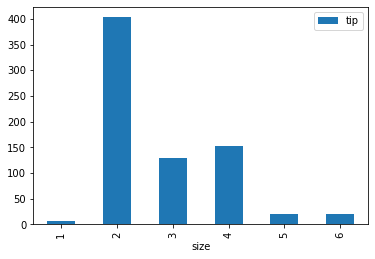

In [23]:
tips_size.plot(kind="bar")

In [24]:
# Syntax to write a new column.

tips['tip_%'] = (tips.tip / tips.total_bill) * 100
tips['tip_%']

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tip_%, Length: 244, dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

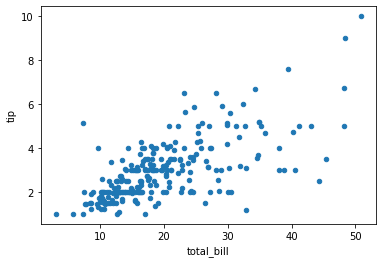

In [25]:
tips.plot.scatter(x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

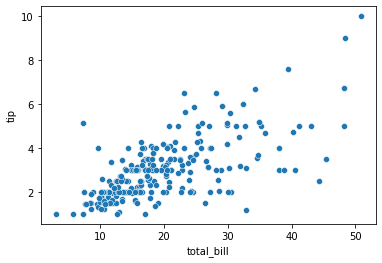

In [26]:
# The sns_lib provides a better visualization
# It demands the input of the x and y axis
sns.scatterplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

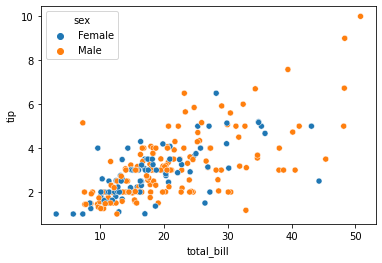

In [27]:
# the "hue" attribute makes the values distinct
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

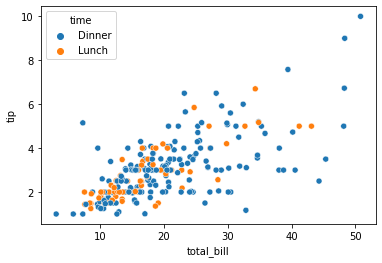

In [28]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time') 

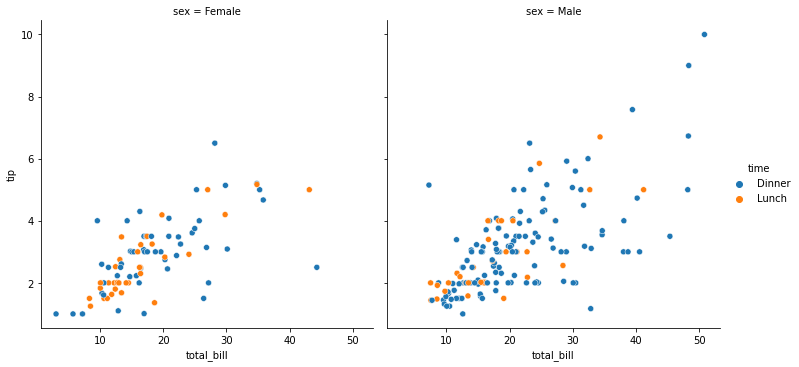

In [29]:
#bifurcation  of time on chart above based on column "sex"
# .relplot = relation plot

sns.relplot(x='total_bill', y='tip', data=tips, col='sex', hue='time')


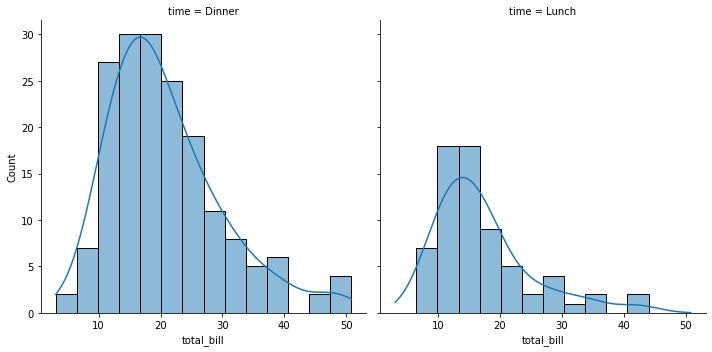

In [30]:
#bifurcation  of time on chart above based on column "time"
# .displot = distribution plot
# "kde=True" helps us produce the histogram chart
sns.displot(data=tips, x='total_bill', col='time', kde=True)


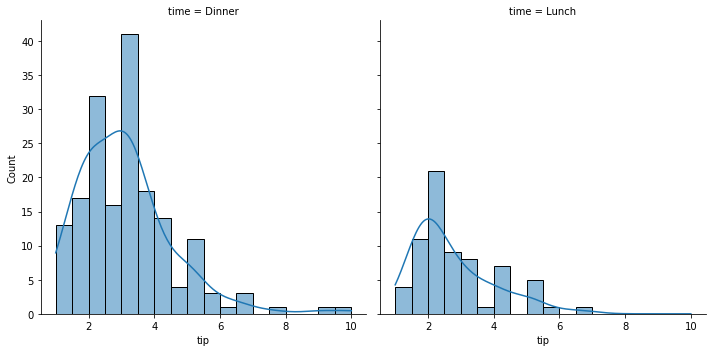

In [31]:
# "kde=True" helps us produce the histogram chart

sns.displot(data=tips, x='tip', col='time', kde=True)


<h3> Creating a clear corellation and distribution for all the numeric variables by sex

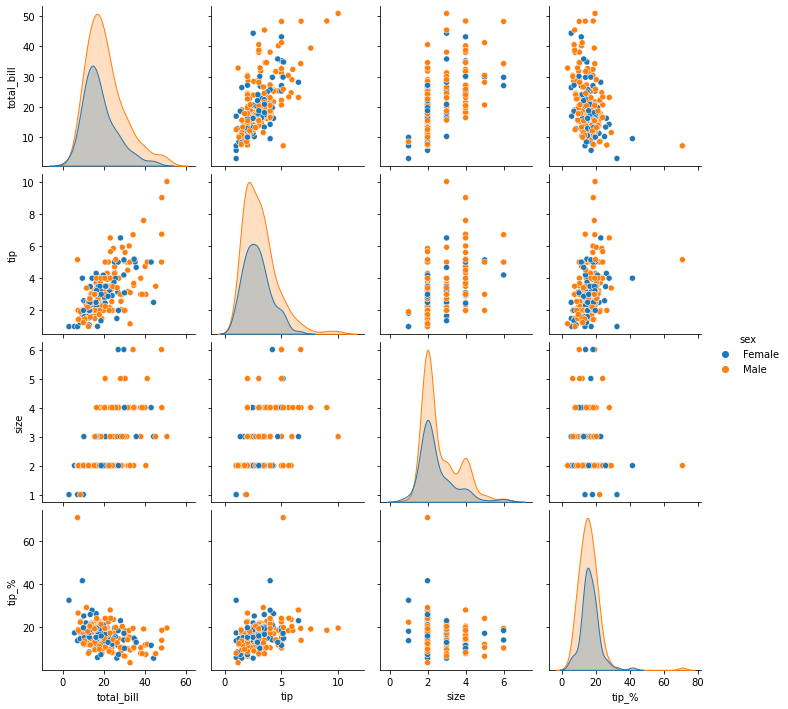

In [32]:
#This produces all the numeric columns on the x-axis and y-axis.
# It allows you compare among all the charts produced
sns.pairplot(data=tips, hue='sex')